#### Importação de libs

In [1]:
!pip install pulp
!pip install latexify-py
import math
import latexify
import pulp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercício 1.2

# Modelagem

#### Função Objetivo

In [2]:
@latexify.with_latex
def maxLucro(x1, x2):
  return 0.3*x1 + 0.5*x2
maxLucro 

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f12983e6210>

#### Restrições tecnicas e Restrições de negatividade

In [3]:
@latexify.with_latex
def restricoes(x1, x2):
  if 1:
    return (2*x1 + x2 <= 2)
  elif 2:
    return (x1 + 3*x2 <= 3)  
  else:
    return (x2 and x1) >= 0

restricoes  

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f12983ee310>

#Método gráfico
#### Achando os pontos
####### Observação inicializar 0 para as variaveis para encontrar o valor da outras


*   Inicializar 0 para as variaveis para encontrar o valor da outras variaveis
*   Equação da função objetivo encontramos o gradiente que está perpendicular a reta da solução

#### Restrição 2x1 + x2 = 2

Quando x1=0 então x2=?
2(0)+x2=2
x2=2

Quando x2=0 então x1=?
2x1+(0)=2
2x1=2
x1=2/2=1

#### Restrição x1 + 3x2 = 3

Quando x1=0 então x2=?
(0) + 3x2 = 3
3x2=3
x2=3/3=1

Quando x2=0 então x1=?
x1 + 3(0) = 3
x1=3

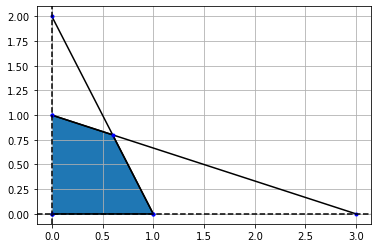

In [4]:
# [x1, y1]
ponto_o = [0, 0] # z = 0
plt.plot(ponto_o)

# Dados retas  

list_values = []
list_values.append([[0, 1], [2, 0]])
list_values.append([[0, 3], [1, 0]])

area_de_solucao = [[0, 1, 0.6, 0], [0, 0, 0.8, 1]]
list_values.append(area_de_solucao)


def plot_pontos(x1, x2, color):
  plt.plot(x1, x2, color=color)

for x in list_values:
  plot_pontos(x[0], x[1], color='black')
  plt.plot(x[0], x[1], 'b.')
  
plt.fill_between(area_de_solucao[0], area_de_solucao[1])

plt.plot(ponto_o, ponto_o, 'b.')


#plt.legend(['Reta 0'], loc=9)

plt.grid(True)
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')
plt.show()

# Programação

In [5]:
# Definir o modelo
model = pulp.LpProblem('Lista 2 - Exercicio 1.2', sense=pulp.LpMaximize)

# Adicionar as variáveis
x = pulp.LpVariable.dicts(indices=[1, 2], cat=pulp.LpContinuous, lowBound=0, name='x')

# Adicionar as Restruições
model.addConstraint(2*x[1] + x[2] <= 2, name='restricao_1')
model.addConstraint(x[1] + 3*x[2] <= 3, name='restricao_2')

# Função Objetivo
model.setObjective(0.3*x[1] + 0.5*x[2])

# Optimizar
model.solve()

# Obter e imprimir a solução
x_sol = {i: x[i].value() for i in [1, 2]}
print(f'x = {x_sol}')
z = 0.3*x_sol[1] + 0.5*x_sol[2]
print(f'z = {z}')

x = {1: 0.6, 2: 0.8}
z = 0.5800000000000001


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
